In [ ]:
!pip install blockdiag
!mkdir diag

In [5]:
A = B = B1 = B2 = C = None
condicion = cond1 = cond2 = True
secuencia = []
from IPython.display import Image

# Repetición

## while, for

# Bucle while

* Repite mientras se cumpla la condición.

In [19]:
%%file diag/while.bd
blockdiag {
    A -> IF,B -> C
    IF -> B  
    
    default_fontsize = 24
    span_height = 80
    default_node_color = "orange"
    default_group_color = "lightgray"
    
    IF[label="Condición", shape="flowchart.condition", width=170, fontsize=20]    
    IF -> B [folded,label="True",fontsize=14]
    IF -> C [label="False",fontsize=14]
    A -> B [dir=none]
    B -> C [style=none]
    group { IF; B; }
}

Overwriting diag/while.bd


In [20]:
!blockdiag diag/while.bd

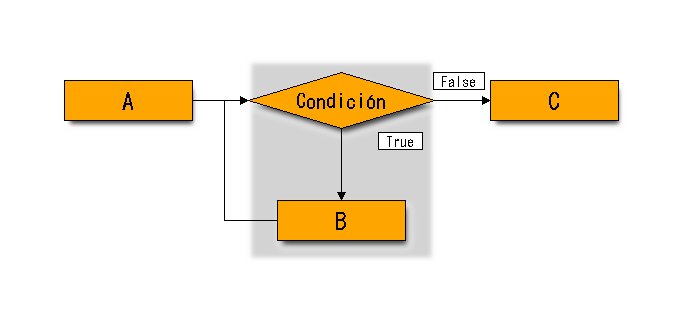

In [21]:
Image("diag/while.png")

In [ ]:
A
while condicion:
    B
C

# Enumeración exhaustiva

* A veces es posible probar **todas las posibilidades**.

In [23]:
def raiz_cubica(n):
    i = 1
    while i**3 < n:
        i = i + 1

    if i**3 == n:
        return i

In [24]:
raiz_cubica(27)

3

# Función de decremento

* Transforma variables a entero
* Al entrar es **no negativo**
* Cuando es $\leq 0$ sale del bucle
* Se decrementa en cada iteración


# Bucle for

* Repite sustituyendo variable de control por cada elemento.

In [49]:
%%file diag/for.bd
blockdiag {
    A -> IN -> B -> OUT -> C
    
    default_fontsize = 24
    default_node_color = "orange"
    default_group_color = "lightgray"
    
    IN[label="Para x en ...", shape="flowchart.loopin", fontsize=20, width=150]    
    OUT[label="", shape="flowchart.loopout", width=150]
    group { orientation=portrait; IN; B; OUT; }
}

Overwriting diag/for.bd


In [50]:
!blockdiag diag/for.bd

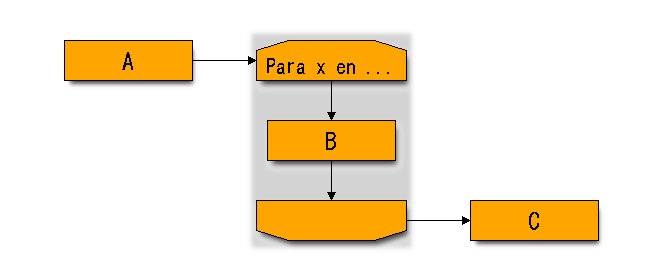

In [51]:
Image("diag/for.png")

In [47]:
A
for x in secuencia:
    B
C

# Enumeración exhaustiva (for)

* Si podemos expresar **todas las posibilidades** como secuencia.

In [57]:
def raiz_cubica(n):
    for i in range(n + 1):
        if i**3 >= n:
            break

    if i**3 == n:
        return i

In [58]:
raiz_cubica(27)

3

# Ejemplo 1

* Escribe una función `cuadrado` que imprima en pantalla un cuadrado del tamaño que se indica en el argumento. 

In [59]:
def cuadrado(n):
    print('*'*n)
    for i in range(n-2):
        print('*' + ' '*(n-2) + '*')
    print('*'*n)

In [63]:
cuadrado(3)

***
* *
***


# Ejemplo 2

* Escribe una función `cuadrado` que imprima en pantalla un cuadrado del tamaño que se indica en el argumento. 

In [59]:
def cuadrado(n):
    print('*'*n)
    for i in range(n-2):
        print('*' + ' '*(n-2) + '*')
    print('*'*n)

In [63]:
cuadrado(3)

***
* *
***


# Refinamiento sucesivo

* Conjeturar y comprobar
  * Enumeración exhaustiva
  * **Búsqueda por bisección**
  * Método de Newton-Raphson

In [34]:
%%file diag/biseccion.bd
blockdiag {
    G -> min -> A -> B -> C -> conjetura -> D -> E -> F -> max -> H [dir=none, style=dotted]
    
    default_fontsize = 24
    default_node_color = "orange"
    default_group_color = "lightgray"
    
    min,max,conjetura [style=none]
    A,B,C,D,E,F [label="",width=1]
    G,H [shape=none]
}

Overwriting diag/biseccion.bd


In [35]:
!blockdiag diag/biseccion.bd

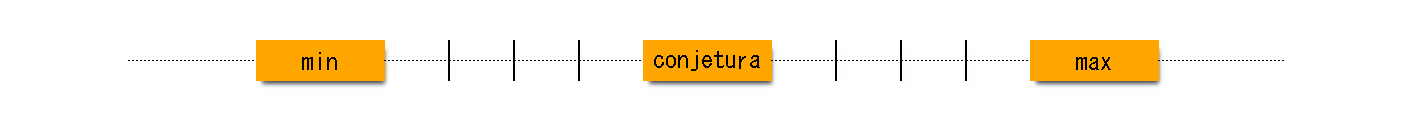

In [36]:
Image("diag/biseccion.png")

# Búsqueda por bisección

In [37]:
def raiz_cuadrada(x, epsilon):
    low = 0.0
    high = max(1.0, x)
    r = (high + low)/2.0
    while abs(r**2 - x) >= epsilon:
        if r**2 < x: low = r
        else: high = r
        r = (high + low)/2.0
    return r

# Límites de representación

In [ ]:
x = 0.0
for i in range(10):
    x = x + 0.1

if x == 1.0:
    print(x, '= 1.0')
else:
    print(x, '!= 1.0')

# Método de Newton-Raphson

* Encontrar las raíces de una función $f(x)$ continua y derivable.  Es decir, $x$ tal que $f(x) = 0$.

  * Si $x_i$ conjetura, $x_i - p(x_i)/p'(x_i)$ es mejor conjetura
  
<img src="img/NewtonRaphson.jpg">

Fuente: [NewtonRaphson Wiki](http://newtons.wikia.com/wiki/NewtonRaphson_Wiki)

# Raíz cuadrada con Newton-Raphson

* Sea $f(x) = x^2 - k$

In [39]:
def raiz_cuadrada(k, epsilon):
    x = k/2.0
    while abs(x**2 - k) >= epsilon:
        x -= (x**2 - k)/(2*x)
    return x

In [44]:
raiz_cuadrada(2,.0000001)

1.4142135623746899

## Rombo con caracteres ASCII

In [6]:
def imprimir_rombo(n):
    assert n % 2 == 0, 'El argumento debe ser par'
    assert n >= 2, 'El argumento debe ser mayor o igual a 2'
    for i in range(n//2):
        imprimir_linea_rombo('/', '\\', i, n)
    for i in reversed(range(n//2)):
        imprimir_linea_rombo('\\', '/', i, n)

def imprimir_linea_rombo(a,b,i,n):
    print(' '*(n//2-i-1)+a+' '*(2*i)+b)

In [7]:
imprimir_rombo(8)

   /\
  /  \
 /    \
/      \
\      /
 \    /
  \  /
   \/


# Créditos

* Extractos de MIT Open Courseware (6.00 [Introduction to Computer Science and Programming](http://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-00-introduction-to-computer-science-and-programming-fall-2008/)) de Eric Grimson y John Guttag.